# Aufgabenblatt 6

<p style="border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser Übung beschäftigen wir uns mit harmonischen Signalen und der Fouriertransformation. Diese ist eine der wichsten Werkzeuge der Signalanalyse und erlaubt uns die spektralen Komponenten eines Signals zu studieren.
</p>

<p style="border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Im allgemeinen haben die Funktionen weitere Argumente die übergeben werden können. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente darlegt und ihre Funktion beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.sin.html">numpy.sin(...)</a> Berechnet den Wert der Funktion sin(x). <br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html">numpy.fft(...)</a> Berechnet die Fouriertransformation des übergebenen Signals. Dafür wird der FFT-Algorithmus verwendet.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html">numpy.fftfreq(...)</a> Diese Funktion gibt die evaluierten Frequenzen der Fouriertransformation der Länge n mit der zeitlichen Schrittweite d zurück.<br>
</p>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Aufgabe 1 Signal aus harmonischen Funktionen

Wie Sie in der Vorlesung gesehen haben, können periodische Signale aus Sinus- und Kosinusfunktionen aufgebaut werden. Oder allgemeiner formuliert: Die Sinus- und Kosinusfunktionen bilden eine Orthonormalbasis periodischer Funktionen.

Dieses Prinzip wollen wir in der ersten Aufgabe veranschaulichen, indem wir eine periodische Funktion nehmen und sie mit Sinusfunktionen annähern. Dabei werden Sie sehen, dass bereits wenige Summanden der unendlichen Reihe genügen, um die Strukturen der Ausgangsfunktion zu rekonstruieren.


##  a)


Laden Sie den Datensatz `square.txt` und plotten Sie ihn. Er beinhaltet die erste Periode eines Rechtecksignals zusammen mit der dazugehörigen Zeitachse.

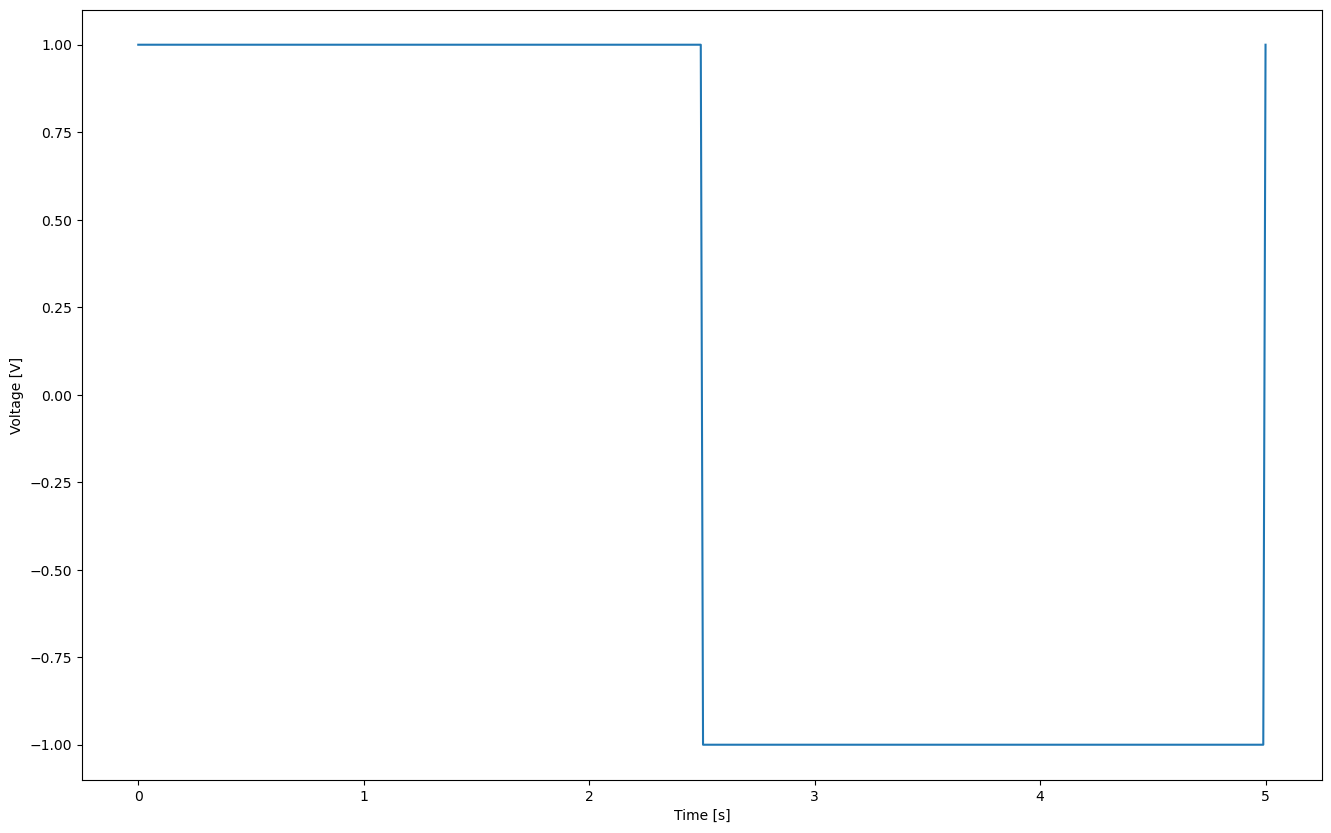

In [31]:
data1 = np.loadtxt('square.txt', comments='#', delimiter=' ')
t = data1[0]
V = data1[1]

_, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.plot(t, V)

##  b)


Wir wollen nun das Signal aus einzelnen harmonischen Funktionen aufbauen. Aufgrund der Symmetrie des Signals kann man erkennen, dass es aus Sinusfunktionen aufgebaut ist (Nullstellen bei $t=0, t=T/2$ und $t=T$). Die niedrigste relevante Frequenz $f_1$ ist diejenige, die der inversen Messzeit entspricht,  und alle höheren Frequenzen müssen ein ganzzahliges Vielfaches davon sein, damit sie die Randbedingung $U(t + T) = U(t)$ erfüllen.

Wir wollen das Signal also als
    
$$ U(t) = \sum_{n=0}^{N} a_n \sin(2\pi f_n t) $$
    
ausdrücken, wobei $f_n = n \cdot f_1$ ist und $N$ die Anzahl Frequenzkomponenten, die berücksichtigt werden. Die richtigen Amplituden $a_n$, um auf diese Weise ein beliebiges Signal zu konstruieren, können mithilfe der Fouriertransformation berechnet werden, wie Sie in Aufgabe 2 sehen werden. In diesem Fall sind sie gegeben als

$$ a_n = \begin{cases} \frac{4}{\pi n} & \textrm{ für ungerade } n \\ 0 & \textrm{ für gerade }n \end{cases}$$

Schreiben Sie eine Funktion, die die Summe in Gleichung (1) berechnet, wobei als Argumente die Zeitachse $t$ und die Anzahl $N$ der berücksichtigten Frequenzen übergeben werden. Plotten Sie dann das so konstruierte Signal zusammen mit der Rechteckfunktion für verschiedene $N$ um sich zu veranschaulichen, wie das Rechtecksignal immer besser angenähert wird, wenn Sie mehr Frequenzkomponenten dazuaddieren.

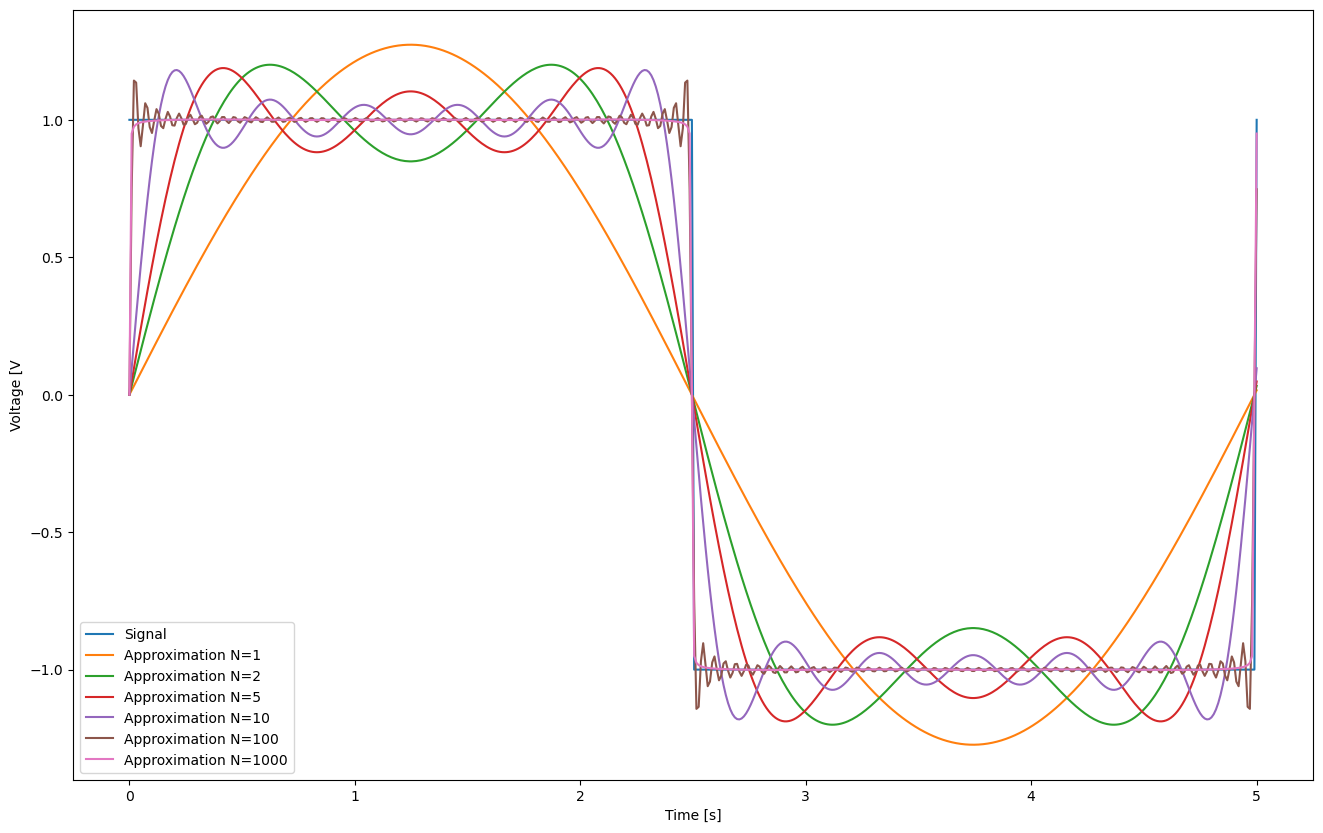

In [27]:
def my_U(t, N):
    f1 = 1/(t[-1] - t[1])
    res = np.zeros(len(t))
    for j in range(1, N+2):
        an = 4/(np.pi*j) if j % 2 != 0 else 0
        res += an * np.sin(2*np.pi * j * f1 * t)
    return res

_, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V')
ax.plot(t, V, label='Signal')
for i in (1, 2, 5, 10, 100, 1000):
    ax.plot(t, my_U(t, i), label=f'Approximation N={i}')
ax.legend()

#  Aufgabe 2 Fouriertransformation

Im obigen Beispiel haben wir als Basis Sinusfunktionen genommen, da sie genau die richtige Phase für unser Signal hatten. Im Allgemeinen ist dies jedoch nicht der Fall, und man muss entweder für jede Frequenz eine Phase $\phi_n$ einführen,

$$x(t) = \sum_{n=0}^{\infty} a_n \sin(2\pi f_n t + \phi_n),$$

einen Kosinusterm hinzufügen,

$$x(t) = \sum_{n=0}^{\infty} a_n \sin(2\pi f_n t) + b_n \cos(2\pi f_n t),$$

oder, was in den meisten Fällen gemacht wird, man benutzt die Exponentialfunktion als Basis,

$$x(t) = \sum_{n=-\infty}^{\infty} a_n e^{i2\pi f_n t},$$
    
womit wir bei der Definition aus der Vorlesung angelangt sind.

In dieser Aufgabe geht es darum, die Amplituden $a_n$ für ein beliebiges Signal zu ermitteln, also die Fouriertransformation auf ein Signal anzuwenden. In Numpy existiert dazu ein ganzes Modul mit entsprechenden Funktionen, von denen wir hier aber lediglich `np.fft.fft` und `np.fft.fftfreq` anschauen werden. Auf der [Website](https://numpy.org/doc/stable/reference/routines.fft.html) finden Sie die Definition der diskreten Fouriertransformation, die in von Numpy verwendet wird. 

In der Vorlesung wurde die diskrete Fouriertransformation definiert als

$$a_n = \frac{1}{N}\sum_{k=0}^{N-1} x(t_k)e^{-i2\pi f_n t_k},$$

wobei wir die diskretisierte Zeitachse $t_k = k\cdot\Delta t$ betrachten. Durch Einsetzen von

$$
\begin{align}
f_n &= n \cdot f_1 = \frac{n}{N \cdot \Delta t},\\
t_k &= k \cdot \Delta t
\end{align}
$$

erhält man die Form

$$a_n = \frac{1}{N}\sum_{k=0}^{N-1} x(t_k)e^{-i2\pi n k / N},$$

die Sie auch in der Dokumentation von Numpy finden. Beachten Sie, dass der Normierungsfaktor $\frac{1}{N}$ bei Numpy in der Rücktransformation vorhanden ist, was aber lediglich eine Frage der Konvention ist.

## a)

Laden Sie die Daten aus `'Signal.txt'` und plotten Sie sie. Welche Frequenzen können Sie von Auge erkennen (zoomen Sie die x-Achse entsprechend)?

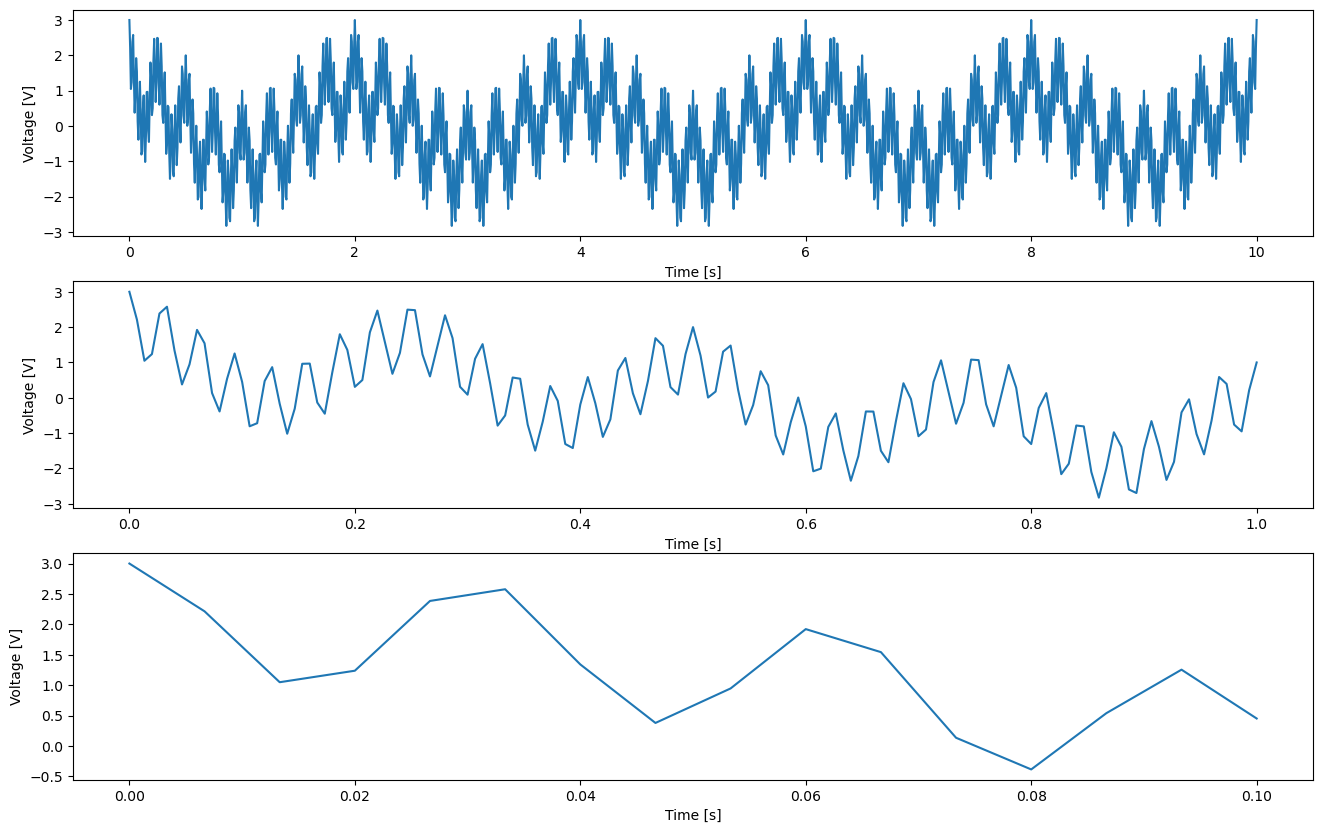

In [42]:
data2 = np.loadtxt('Signal.txt', comments='#', delimiter=' ')
t = data2[0]
V = data2[1]

_, ax = plt.subplots(3, figsize=(16,10))
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Voltage [V]')
ax[0].plot(t, V)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Voltage [V]')
ax[1].plot(t[:151], V[:151])
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Voltage [V]')
ax[2].plot(t[:16], V[:16])

Erkennbare Frequenzen: ca. $0.5,4,32\,\mathrm{Hz}$

##  b)

Bestimmen Sie aufgrund der Zeitachse die Nyquist-Frequenz, sowie die Frequenzuflösung, die Sie für die Fouriertransformation erwarten.

In [41]:
f_nq = 1 / (2 * (t[1] - t[0]))
print(f'Nyquist: {f_nq} Hz')

f_res = 2 * f_nq / len(t)
print(f'Resolution: {f_res:.2} Hz')

Nyquist: 75.0 Hz
Resolution: 0.1 Hz


## c)

Berechnen Sie nun die Fouriertransformation der Daten. Unter `Implementation details` des obigen Links finden Sie, in welcher Reihenfolge die Amplituden von `np.fft.fft` zurückgegeben werden. Die Funktion `np.fft.fftfreq` gibt ihnen die entsprechend geordnete Frequenzachse. Plotten Sie zuerst die Frequenzen $f_n$ selbst als Funktion des Index $n$ um zu veranschaulichen, wie die Daten geordnet sind, und dann die spektrale Leistungsdichte als Funktion der Frequenzen. Finden Sie die Frequenzen wieder, die Sie in a) gefunden haben?

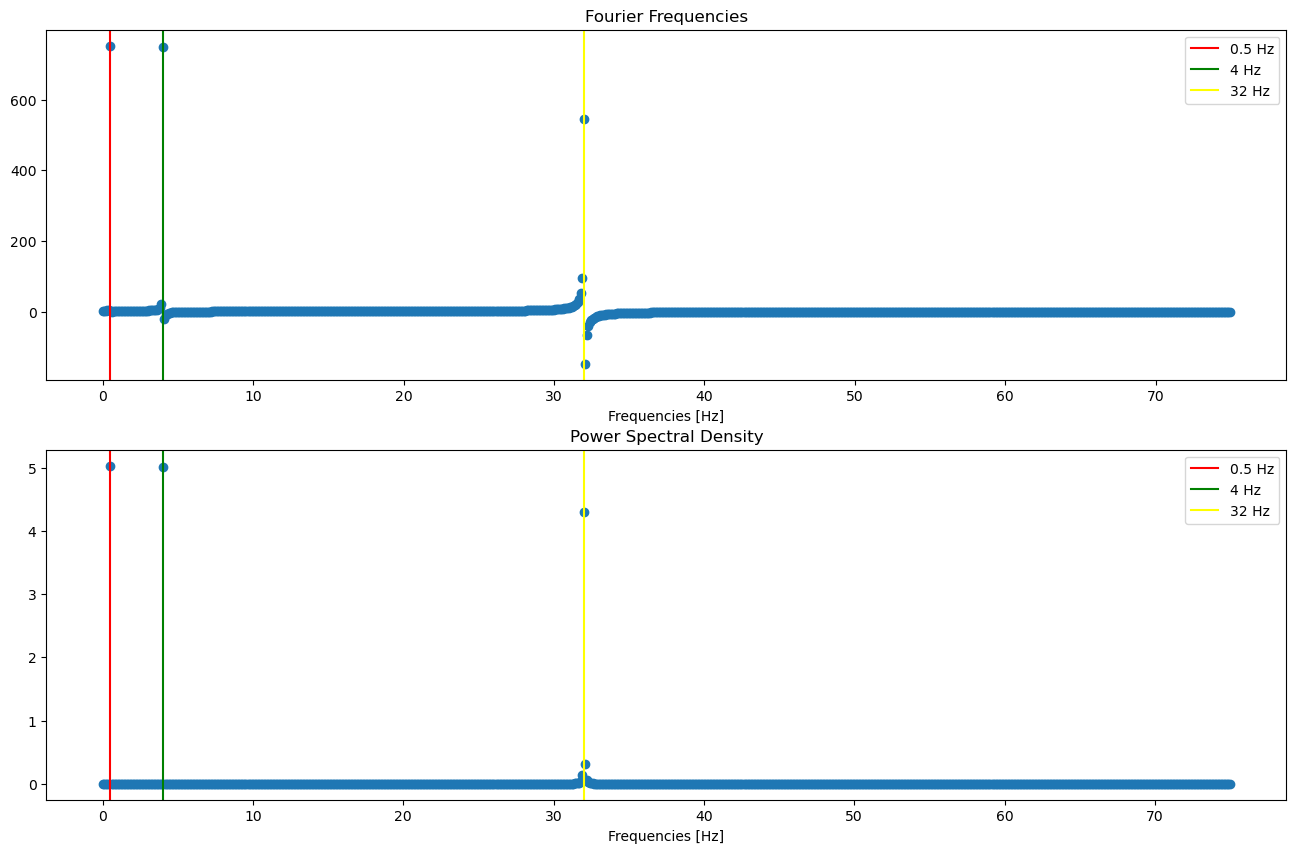

In [43]:
_, ax = plt.subplots(2, figsize=(16,10))

ax[0].set_title('Fourier Frequencies')
ax[0].set_xlabel('Frequencies [Hz]')
ax[0].plot(np.fft.rfftfreq(len(V), t[1]), np.real(np.fft.rfft(V)), 'o')
ax[0].axvline(x=0.5, color='red', label='0.5 Hz')
ax[0].axvline(x=4, color='green', label='4 Hz')
ax[0].axvline(x=32, color='yellow', label='32 Hz')
ax[0].legend()

f, psd = sp.signal.periodogram(V, len(t)/t[-1], return_onesided=True, scaling='density')
ax[1].set_title('Power Spectral Density')
ax[1].set_xlabel('Frequencies [Hz]')
ax[1].plot(f, psd, 'o')
ax[1].axvline(x=0.5, color='red', label='0.5 Hz')
ax[1].axvline(x=4, color='green', label='4 Hz')
ax[1].axvline(x=32, color='yellow', label='32 Hz')
ax[1].legend()

###  d)

Betrachten Sie nochmals das Recktecksignal aus Aufgabe 1. Berechnen Sie die Fouriertransformation und plotten Sie die spektrale Leistungsdichte. Sie sollten das Verhalten der Amplituden aus Aufgabe 1 rekonstruieren können, sprich die Abnahme mit $1/n$ sowie dass die Frequenzen mit geraden $n$ verschwindend klein sind. Da aber die Normierungskonvention der `numpy` Fouriertransformation sowie die Basis anders sind, wird die Grösse der Amplituden anders sein.

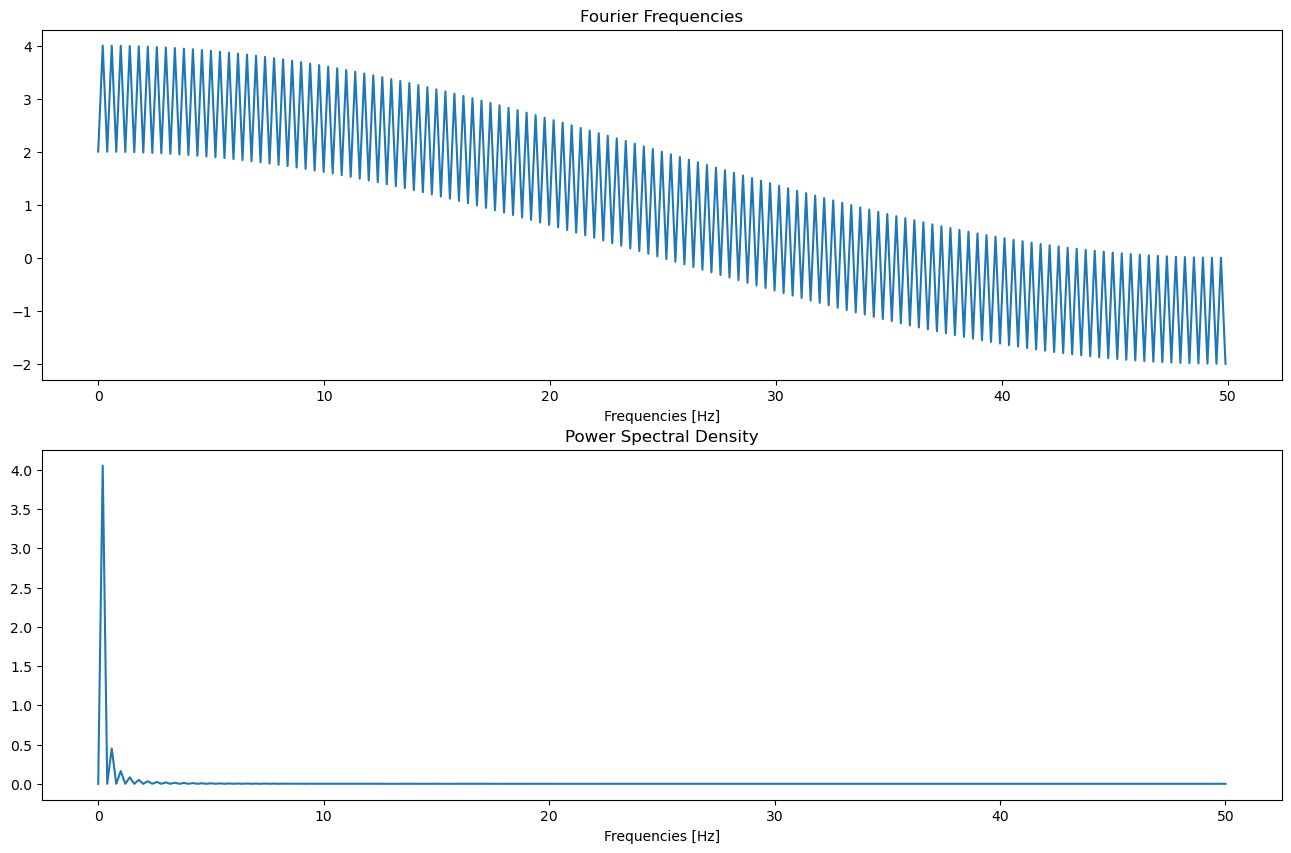

In [45]:
_, ax = plt.subplots(2, figsize=(16,10))
t = data1[0]
V = data1[1]

ax[0].set_title('Fourier Frequencies')
ax[0].set_xlabel('Frequencies [Hz]')
ax[0].plot(np.fft.rfftfreq(len(V), t[1]), np.real(np.fft.rfft(V)), '-')

f, psd = sp.signal.periodogram(V, len(t)/t[-1], return_onesided=True, scaling='density')
ax[1].set_title('Power Spectral Density')
ax[1].set_xlabel('Frequencies [Hz]')
ax[1].plot(f, psd, '-')